# Examine and Visualize Training loop data
1) Use DuckDBHelper's `get_full_dataset_dataframe` to build full dataframe
2) Create simple visualizations such as density plots, bar plots, heatmaps of PCA composite features etc. 
3) One-hot encoder to turn label column numeric
4) Find Correlation between engineered features and numeric label (dataset type) then rank engineered features by how correlated they are to target (preview of how well engineered features may be able to predict the dataset type)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
import os
from pathlib import Path

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

# Local imports
from api.utils.duckdb_utils import DuckDBHelper
from src.helpers import initialize_logging

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Initialize logging
logger = initialize_logging("training_input_analysis")

print("✅ Libraries imported successfully")
print(f"📁 Project root: {project_root}")


2025-08-14 16:18:31,626 - src.helpers - INFO - Logging initialized for /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/logs/duckdb_utils.log
2025-08-14 16:18:31,626 - src.helpers - INFO - Logging initialized for /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/logs/duckdb_utils.log
2025-08-14 16:18:31,676 - src.helpers - INFO - Logging initialized for /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/logs/training_input_analysis.log
2025-08-14 16:18:31,676 - src.helpers - INFO - Logging initialized for /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/logs/training_input_analysis.log
2025-08-14 16:18:31,676 - src.helpers - INFO - Logging initialized for /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/logs/training_input_analysis.log


✅ Libraries imported successfully
📁 Project root: /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025


In [2]:
# Step 1: Load full dataset using DuckDBHelper
print("🔄 Loading full dataset from DuckDB...")

# Initialize DuckDB helper
db_path = "../artifacts/mdc_challenge.db"
db_helper = DuckDBHelper(db_path)

try:
    # Get full dataset dataframe with all engineered features
    df_full = db_helper.get_full_dataset_dataframe(
        dataset_ids=None,  # Include all datasets
        feature_filter=None,  # Include all features
        fill_na=True
    )
    
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df_full.shape}")
    print(f"📋 Columns: {list(df_full.columns)}")
    print(f"\n🔍 First few rows:")
    display(df_full.head())
    
except Exception as e:
    print(f"❌ Error loading dataset: {str(e)}")
    raise


2025-08-14 16:18:31,795 - api.database.duckdb_schema - INFO - Starting DuckDB schema creation...
2025-08-14 16:18:31,795 - api.database.duckdb_schema - INFO - Starting DuckDB schema creation...
2025-08-14 16:18:31,795 - api.database.duckdb_schema - INFO - Starting DuckDB schema creation...


🔄 Loading full dataset from DuckDB...


2025-08-14 16:18:31,989 - api.database.duckdb_schema - INFO - Creating documents table...
2025-08-14 16:18:31,989 - api.database.duckdb_schema - INFO - Creating documents table...
2025-08-14 16:18:31,989 - api.database.duckdb_schema - INFO - Creating documents table...
2025-08-14 16:18:31,998 - api.database.duckdb_schema - INFO - Documents table created successfully
2025-08-14 16:18:31,998 - api.database.duckdb_schema - INFO - Documents table created successfully
2025-08-14 16:18:31,998 - api.database.duckdb_schema - INFO - Documents table created successfully
2025-08-14 16:18:32,001 - api.database.duckdb_schema - INFO - Creating citations table...
2025-08-14 16:18:32,001 - api.database.duckdb_schema - INFO - Creating citations table...
2025-08-14 16:18:32,001 - api.database.duckdb_schema - INFO - Creating citations table...
2025-08-14 16:18:32,006 - api.database.duckdb_schema - INFO - Citations table created successfully
2025-08-14 16:18:32,006 - api.database.duckdb_schema - INFO - Ci

✅ Dataset loaded successfully!
📊 Dataset shape: (692, 74)
📋 Columns: ['dataset_id', 'document_id', 'total_tokens', 'avg_tokens_per_chunk', 'total_char_length', 'clean_text_length', 'cluster', 'dataset_type', 'text', 'created_at', 'updated_at', 'LEIDEN_cluster_0', 'LEIDEN_cluster_1', 'LEIDEN_cluster_10', 'LEIDEN_cluster_11', 'LEIDEN_cluster_12', 'LEIDEN_cluster_13', 'LEIDEN_cluster_14', 'LEIDEN_cluster_15', 'LEIDEN_cluster_16', 'LEIDEN_cluster_17', 'LEIDEN_cluster_18', 'LEIDEN_cluster_19', 'LEIDEN_cluster_2', 'LEIDEN_cluster_20', 'LEIDEN_cluster_21', 'LEIDEN_cluster_22', 'LEIDEN_cluster_23', 'LEIDEN_cluster_24', 'LEIDEN_cluster_25', 'LEIDEN_cluster_26', 'LEIDEN_cluster_27', 'LEIDEN_cluster_28', 'LEIDEN_cluster_29', 'LEIDEN_cluster_3', 'LEIDEN_cluster_30', 'LEIDEN_cluster_31', 'LEIDEN_cluster_32', 'LEIDEN_cluster_33', 'LEIDEN_cluster_34', 'LEIDEN_cluster_35', 'LEIDEN_cluster_36', 'LEIDEN_cluster_37', 'LEIDEN_cluster_38', 'LEIDEN_cluster_39', 'LEIDEN_cluster_4', 'LEIDEN_cluster_40', 'LEID

,dataset_id,document_id,total_tokens,avg_tokens_per_chunk,total_char_length,clean_text_length,cluster,dataset_type,text,created_at,...,LEIDEN_cluster_57,LEIDEN_cluster_58,LEIDEN_cluster_6,LEIDEN_cluster_7,LEIDEN_cluster_8,LEIDEN_cluster_9,PCA_1,PCA_2,UMAP_1,UMAP_2
0,https://doi.org/10.5061/dryad.4dj6042,10.1093_beheco_arz101,1865,621.666687,6192,6192,None,PRIMARY,"Biol Fish. 72:223–225. Kolm N, Ahnesjö I. 200...",2025-08-14 15:29:27.369553,...,0.011347,0.026468,-0.018782,-0.021565,0.011538,0.042685,-0.121417,0.064072,14.825799,-1.024811
1,https://doi.org/10.5061/dryad.r7sqv9s8n,10.1111_1365-2745.13449,2014,671.333313,6846,6846,None,PRIMARY,"by soil biota effects; however, in our semi-fi...",2025-08-14 15:29:27.369573,...,-0.014745,0.028080,-0.005014,-0.040497,-0.001311,0.018233,-0.159658,-0.039563,16.142666,-0.566373
2,https://doi.org/10.11583/dtu.20555586,10.1016_j.fuel.2022.125768,1383,461.000000,5913,5913,None,PRIMARY,General rights Copyright and moral rights for ...,2025-08-14 15:29:27.369589,...,-0.041072,-0.020314,-0.006238,-0.013478,-0.022679,-0.035793,-0.101954,-0.122548,14.022445,2.653141
3,https://doi.org/10.11583/dtu.20555586.v3,10.1016_j.fuel.2022.125768,1383,461.000000,5913,5913,None,PRIMARY,General rights Copyright and moral rights for ...,2025-08-14 15:29:27.369595,...,-0.041072,-0.020314,-0.006238,-0.013478,-0.022679,-0.035793,-0.101954,-0.122548,14.087899,2.650471
4,https://doi.org/10.5061/dryad.8153g,10.7554_elife.29944,2229,743.000000,6994,6994,None,PRIMARY,"Stiller M, Shapiro B 2017 Mitochondrial genome...",2025-08-14 15:29:27.369619,...,0.007157,0.013782,0.046195,0.037758,-0.028885,0.001056,0.117165,0.079101,12.338050,-4.344994


In [3]:
# Step 2: Data preprocessing and target encoding
print("🔄 Preprocessing data and encoding target variable...")

# Check dataset_type distribution
print("📊 Dataset type distribution:")
print(df_full['dataset_type'].value_counts())
print(f"\n📈 Dataset type percentages:")
print(df_full['dataset_type'].value_counts(normalize=True) * 100)

# Create binary encoding: PRIMARY=1, SECONDARY=0
df_full['target'] = (df_full['dataset_type'] == 'PRIMARY').astype(int)

print(f"\n✅ Binary encoding created:")
print(f"   PRIMARY (1): {(df_full['target'] == 1).sum()} samples")
print(f"   SECONDARY (0): {(df_full['target'] == 0).sum()} samples")

# Check for missing values in target
missing_target = df_full['target'].isna().sum()
print(f"🔍 Missing values in target: {missing_target}")

# Identify feature columns (exclude metadata columns)
metadata_cols = ['dataset_id', 'document_id', 'dataset_type', 'target', 'created_at', 'updated_at', 'text', 'cluster']
feature_cols = [col for col in df_full.columns if col not in metadata_cols]

print(f"\n📋 Feature columns identified: {len(feature_cols)} features")
print(f"   Features: {feature_cols}")

# Check for missing values in features
missing_features = df_full[feature_cols].isna().sum()
print(f"\n🔍 Missing values per feature:")
print(missing_features[missing_features > 0])


🔄 Preprocessing data and encoding target variable...
📊 Dataset type distribution:
dataset_type
SECONDARY    433
PRIMARY      259
Name: count, dtype: int64

📈 Dataset type percentages:
dataset_type
SECONDARY    62.572254
PRIMARY      37.427746
Name: proportion, dtype: float64

✅ Binary encoding created:
   PRIMARY (1): 259 samples
   SECONDARY (0): 433 samples
🔍 Missing values in target: 0

📋 Feature columns identified: 67 features
   Features: ['total_tokens', 'avg_tokens_per_chunk', 'total_char_length', 'clean_text_length', 'LEIDEN_cluster_0', 'LEIDEN_cluster_1', 'LEIDEN_cluster_10', 'LEIDEN_cluster_11', 'LEIDEN_cluster_12', 'LEIDEN_cluster_13', 'LEIDEN_cluster_14', 'LEIDEN_cluster_15', 'LEIDEN_cluster_16', 'LEIDEN_cluster_17', 'LEIDEN_cluster_18', 'LEIDEN_cluster_19', 'LEIDEN_cluster_2', 'LEIDEN_cluster_20', 'LEIDEN_cluster_21', 'LEIDEN_cluster_22', 'LEIDEN_cluster_23', 'LEIDEN_cluster_24', 'LEIDEN_cluster_25', 'LEIDEN_cluster_26', 'LEIDEN_cluster_27', 'LEIDEN_cluster_28', 'LEIDEN_cl

In [4]:
# Drop cols with zero variance
# Step 2.5: Drop columns with zero variance
print("🔄 Identifying and removing zero variance features...")

# Calculate variance for all feature columns
feature_variances = df_full[feature_cols].var()

# Identify zero variance features
zero_var_features = feature_variances[feature_variances == 0].index.tolist()
near_zero_var_features = feature_variances[feature_variances < 1e-10].index.tolist()

print(f"📊 Variance Analysis:")
print(f"   • Total features: {len(feature_cols)}")
print(f"   • Zero variance features: {len(zero_var_features)}")
print(f"   • Near-zero variance features (< 1e-10): {len(near_zero_var_features)}")

if zero_var_features:
    print(f"\n🗑️ Zero variance features to remove:")
    for feature in zero_var_features:
        print(f"   • {feature} (variance = {feature_variances[feature]:.10f})")
else:
    print(f"\n✅ No zero variance features found!")

if near_zero_var_features and len(near_zero_var_features) > len(zero_var_features):
    print(f"\n⚠️ Near-zero variance features:")
    for feature in near_zero_var_features:
        if feature not in zero_var_features:
            print(f"   • {feature} (variance = {feature_variances[feature]:.10f})")

# Remove zero variance features from feature_cols list
features_to_remove = zero_var_features
if features_to_remove:
    feature_cols = [col for col in feature_cols if col not in features_to_remove]
    print(f"\n✅ Updated feature list:")
    print(f"   • Remaining features: {len(feature_cols)}")
    print(f"   • Removed features: {len(features_to_remove)}")
else:
    print(f"\n✅ No features removed - all features have non-zero variance")

# Optional: Show variance distribution
print(f"\n📈 Feature variance statistics:")
remaining_variances = df_full[feature_cols].var()
print(f"   • Min variance: {remaining_variances.min():.10f}")
print(f"   • Max variance: {remaining_variances.max():.2f}")
print(f"   • Mean variance: {remaining_variances.mean():.6f}")
print(f"   • Median variance: {remaining_variances.median():.6f}")

# Show features with lowest variance (potential candidates for removal)
print(f"\n🔍 Features with lowest variance (top 10):")
lowest_var_features = remaining_variances.sort_values().head(10)
for feature, variance in lowest_var_features.items():
    print(f"   • {feature}: {variance:.10f}")

🔄 Identifying and removing zero variance features...
📊 Variance Analysis:
   • Total features: 67
   • Zero variance features: 0
   • Near-zero variance features (< 1e-10): 0

✅ No zero variance features found!

✅ No features removed - all features have non-zero variance

📈 Feature variance statistics:
   • Min variance: 0.0010156117
   • Max variance: 5074999.50
   • Mean variance: 160825.144458
   • Median variance: 0.002319

🔍 Features with lowest variance (top 10):
   • LEIDEN_cluster_26: 0.0010156117
   • LEIDEN_cluster_58: 0.0010227052
   • LEIDEN_cluster_32: 0.0010994332
   • LEIDEN_cluster_52: 0.0011936619
   • LEIDEN_cluster_53: 0.0011957119
   • LEIDEN_cluster_46: 0.0012321455
   • LEIDEN_cluster_57: 0.0012711193
   • LEIDEN_cluster_42: 0.0012915913
   • LEIDEN_cluster_49: 0.0014327027
   • LEIDEN_cluster_24: 0.0014745798


In [5]:
filename = "../Data/train/train_data.csv"
if features_to_remove:
    df_filt = df_full.drop(columns=features_to_remove)
    df_features = df_filt[feature_cols + ['target', 'document_id']].copy()
else:
    df_features = df_full[feature_cols + ['target', 'document_id']].copy()
df_features.to_csv(filename)
print(f"✅ Training data saved to {filename}")

✅ Training data saved to ../Data/train/train_data.csv


In [6]:
# Step 3: Calculate correlations with target variable
print("🔄 Calculating Pearson and Spearman correlations...")

# Prepare data for correlation analysis
# df_features = df_full[feature_cols + ['target']].copy()
df_features = df_features.drop(columns=['document_id'])

# Handle missing values by dropping rows with any NaN in features or target
df_clean = df_features.dropna()
print(f"📊 Clean dataset shape: {df_clean.shape} (removed {len(df_features) - len(df_clean)} rows with missing values)")

# Separate features and target
X = df_clean[feature_cols]
y = df_clean['target']

print(f"🎯 Target distribution in clean data:")
print(f"   PRIMARY (1): {(y == 1).sum()} samples ({(y == 1).mean():.1%})")
print(f"   SECONDARY (0): {(y == 0).sum()} samples ({(y == 0).mean():.1%})")

# Calculate Pearson correlations
print("\n🔄 Calculating Pearson correlations...")
pearson_correlations = []
pearson_pvalues = []

for feature in feature_cols:
    if feature in X.columns:
        # Calculate Pearson correlation using scipy.stats
        corr, pval = stats.pearsonr(X[feature], y)
        pearson_correlations.append({
            'feature': feature,
            'correlation': corr,
            'p_value': pval,
            'abs_correlation': abs(corr)
        })

# Convert to DataFrame and sort by absolute correlation
df_pearson = pd.DataFrame(pearson_correlations)
df_pearson = df_pearson.sort_values('abs_correlation', ascending=False)

print(f"✅ Pearson correlations calculated for {len(df_pearson)} features")
print("🔝 Top 10 Pearson correlations:")
display(df_pearson.head(10))


🔄 Calculating Pearson and Spearman correlations...
📊 Clean dataset shape: (692, 68) (removed 0 rows with missing values)
🎯 Target distribution in clean data:
   PRIMARY (1): 259 samples (37.4%)
   SECONDARY (0): 433 samples (62.6%)

🔄 Calculating Pearson correlations...


✅ Pearson correlations calculated for 67 features
🔝 Top 10 Pearson correlations:


,feature,correlation,p_value,abs_correlation
35,LEIDEN_cluster_37,0.448844,1.318068e-35,0.448844
63,PCA_1,-0.425156,9.512515e-32,0.425156
5,LEIDEN_cluster_1,0.401435,3.519992e-28,0.401435
33,LEIDEN_cluster_35,-0.369543,8.138379e-24,0.369543
31,LEIDEN_cluster_33,-0.359718,1.446074e-22,0.359718
27,LEIDEN_cluster_3,0.348165,3.758480e-21,0.348165
53,LEIDEN_cluster_53,0.330225,4.551470e-19,0.330225
46,LEIDEN_cluster_47,0.323118,2.793974e-18,0.323118
8,LEIDEN_cluster_12,0.320469,5.428976e-18,0.320469
54,LEIDEN_cluster_54,0.315213,1.988393e-17,0.315213


In [7]:
# Calculate Spearman correlations
print("🔄 Calculating Spearman correlations...")
spearman_correlations = []

for feature in feature_cols:
    if feature in X.columns:
        # Calculate Spearman correlation using scipy.stats
        corr, pval = stats.spearmanr(X[feature], y)
        spearman_correlations.append({
            'feature': feature,
            'correlation': corr,
            'p_value': pval,
            'abs_correlation': abs(corr)
        })

# Convert to DataFrame and sort by absolute correlation
df_spearman = pd.DataFrame(spearman_correlations)
df_spearman = df_spearman.sort_values('abs_correlation', ascending=False)

print(f"✅ Spearman correlations calculated for {len(df_spearman)} features")
print("🔝 Top 10 Spearman correlations:")
display(df_spearman.head(10))

# Compare Pearson vs Spearman
print("\n📊 Correlation comparison (Top 10 features by Pearson):")
comparison_df = df_pearson.head(10)[['feature', 'correlation']].merge(
    df_spearman[['feature', 'correlation']], 
    on='feature', 
    suffixes=('_pearson', '_spearman')
)
comparison_df['difference'] = abs(comparison_df['correlation_pearson'] - comparison_df['correlation_spearman'])
display(comparison_df)


🔄 Calculating Spearman correlations...
✅ Spearman correlations calculated for 67 features
🔝 Top 10 Spearman correlations:


,feature,correlation,p_value,abs_correlation
63,PCA_1,-0.451945,3.909074e-36,0.451945
35,LEIDEN_cluster_37,0.447521,2.205814e-35,0.447521
5,LEIDEN_cluster_1,0.430732,1.251345e-32,0.430732
33,LEIDEN_cluster_35,-0.375176,1.494294e-24,0.375176
31,LEIDEN_cluster_33,-0.359657,1.471779e-22,0.359657
27,LEIDEN_cluster_3,0.341238,2.486164e-20,0.341238
53,LEIDEN_cluster_53,0.327663,8.804381e-19,0.327663
40,LEIDEN_cluster_41,0.322116,3.594690e-18,0.322116
46,LEIDEN_cluster_47,0.319844,6.343699e-18,0.319844
8,LEIDEN_cluster_12,0.316794,1.349337e-17,0.316794



📊 Correlation comparison (Top 10 features by Pearson):


,feature,correlation_pearson,correlation_spearman,difference
0,LEIDEN_cluster_37,0.448844,0.447521,0.001323
1,PCA_1,-0.425156,-0.451945,0.026789
2,LEIDEN_cluster_1,0.401435,0.430732,0.029296
3,LEIDEN_cluster_35,-0.369543,-0.375176,0.005632
4,LEIDEN_cluster_33,-0.359718,-0.359657,0.000061
5,LEIDEN_cluster_3,0.348165,0.341238,0.006927
6,LEIDEN_cluster_53,0.330225,0.327663,0.002563
7,LEIDEN_cluster_47,0.323118,0.319844,0.003274
8,LEIDEN_cluster_12,0.320469,0.316794,0.003675
9,LEIDEN_cluster_54,0.315213,0.306732,0.008481


🔄 Creating visualizations...


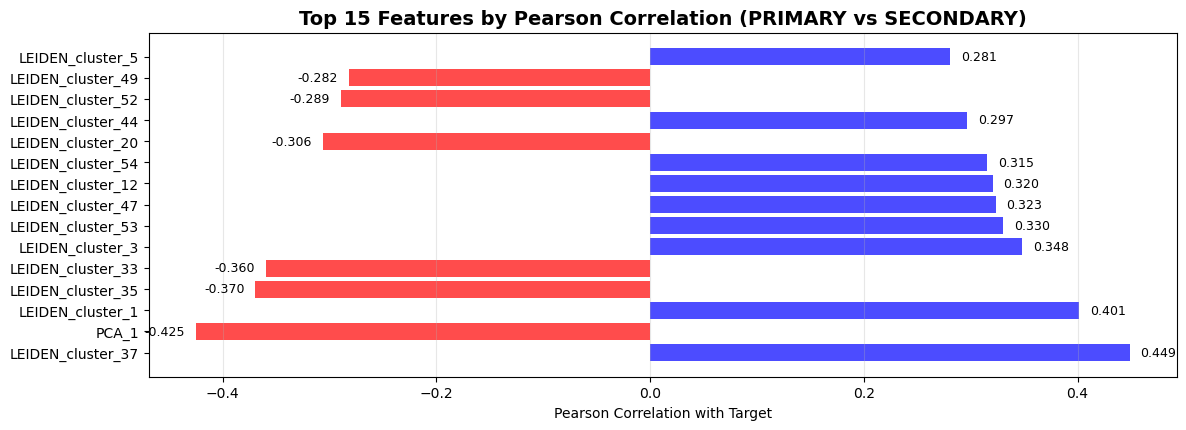

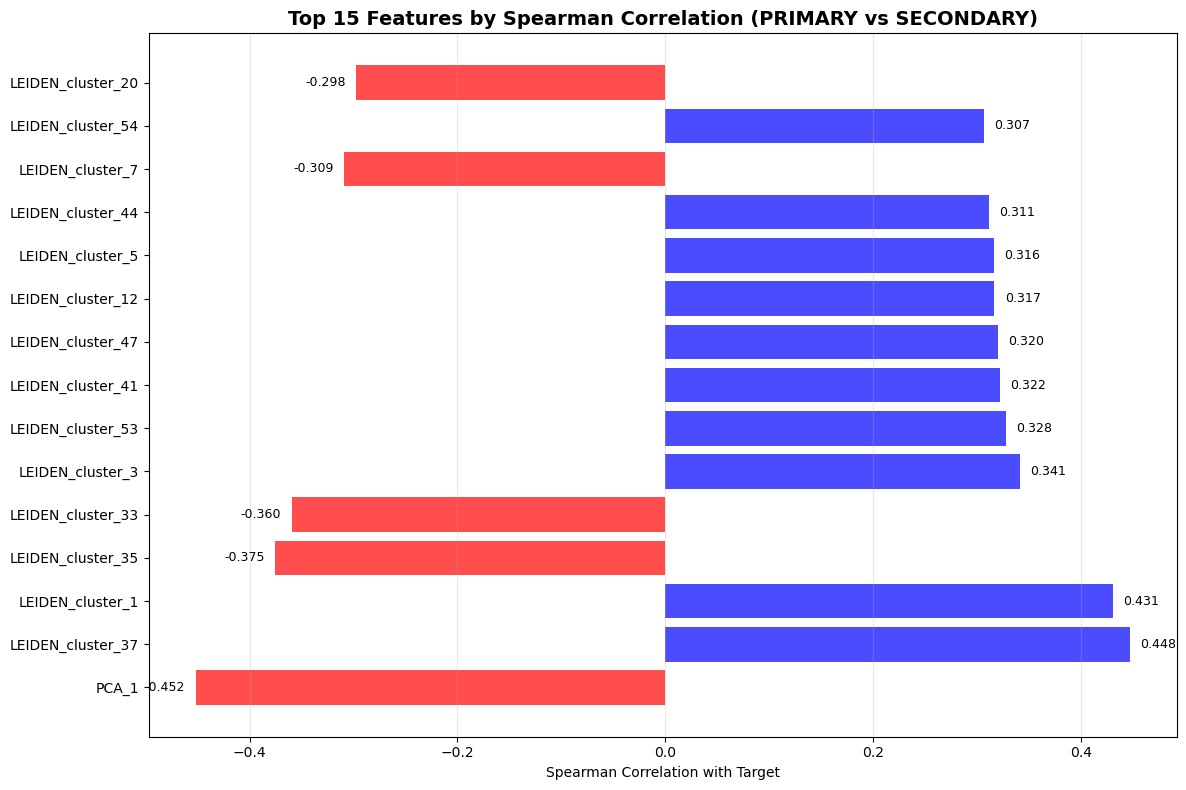

In [8]:
# Step 4: Create visualizations
print("🔄 Creating visualizations...")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("RdBu_r", n_colors=10)

# 1. Feature Importance Ranking Bar Chart (Pearson)
plt.figure(figsize=(12, 8))
top_features_pearson = df_pearson.head(15)

plt.subplot(2, 1, 1)
colors = ['red' if x < 0 else 'blue' for x in top_features_pearson['correlation']]
bars = plt.barh(range(len(top_features_pearson)), top_features_pearson['correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features_pearson)), top_features_pearson['feature'])
plt.xlabel('Pearson Correlation with Target')
plt.title('Top 15 Features by Pearson Correlation (PRIMARY vs SECONDARY)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add correlation values as text
for i, (bar, corr) in enumerate(zip(bars, top_features_pearson['correlation'])):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Feature Importance Ranking Bar Chart (Spearman)
plt.figure(figsize=(12, 8))
top_features_spearman = df_spearman.head(15)

colors = ['red' if x < 0 else 'blue' for x in top_features_spearman['correlation']]
bars = plt.barh(range(len(top_features_spearman)), top_features_spearman['correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features_spearman)), top_features_spearman['feature'])
plt.xlabel('Spearman Correlation with Target')
plt.title('Top 15 Features by Spearman Correlation (PRIMARY vs SECONDARY)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add correlation values as text
for i, (bar, corr) in enumerate(zip(bars, top_features_spearman['correlation'])):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()


🔄 Creating correlation heatmap...


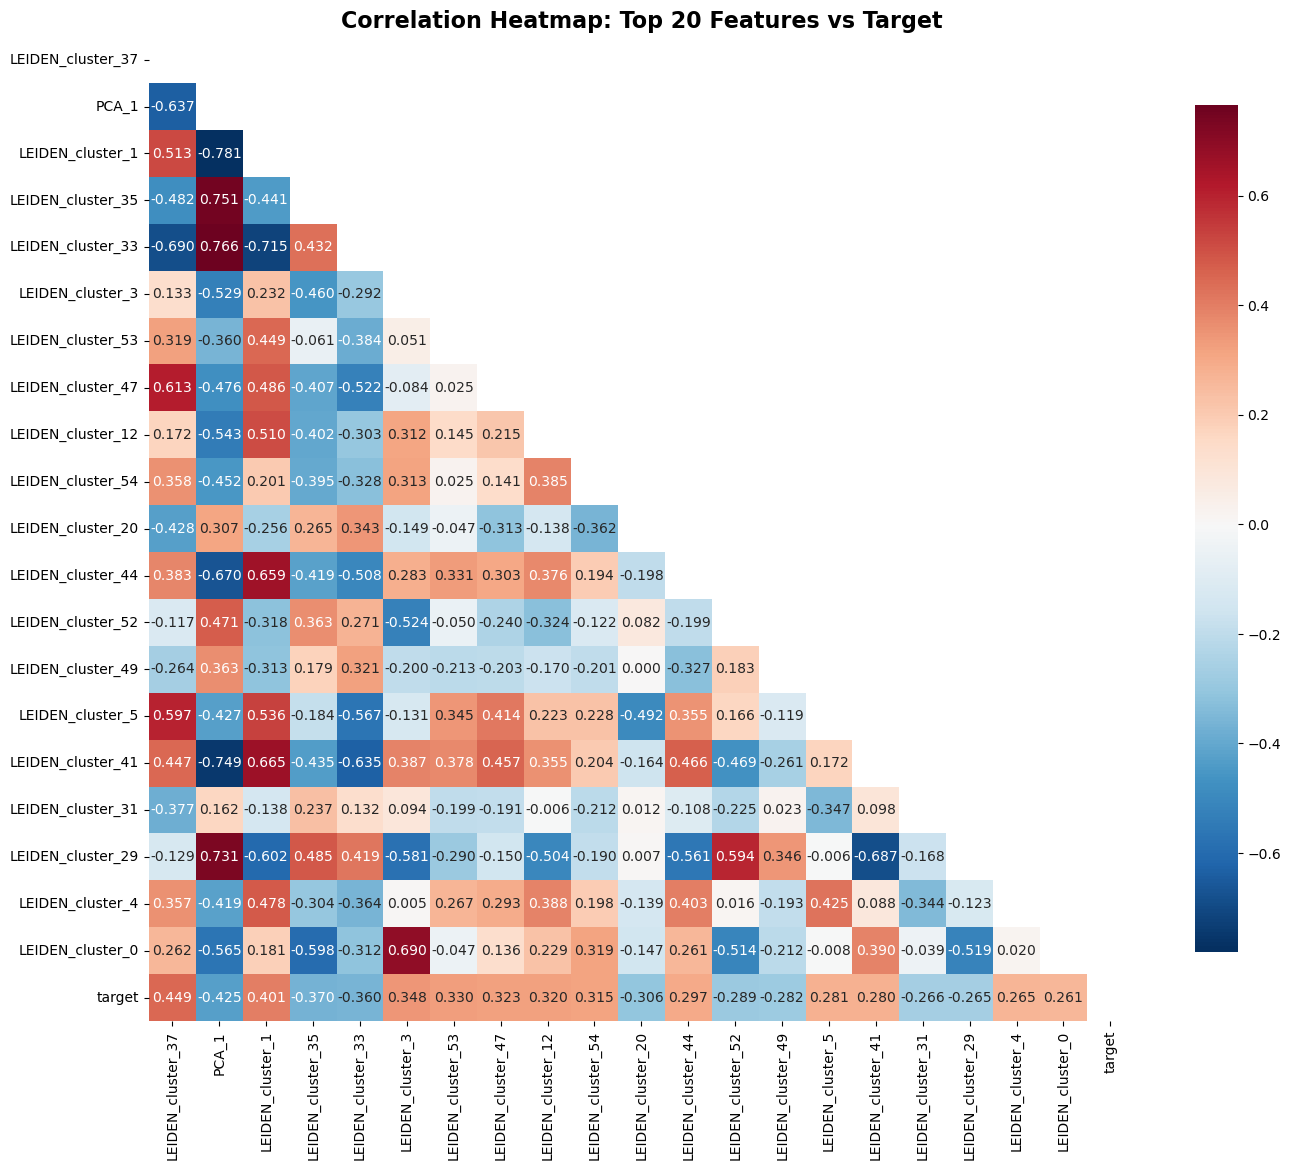

🔄 Creating distribution plots for top features...


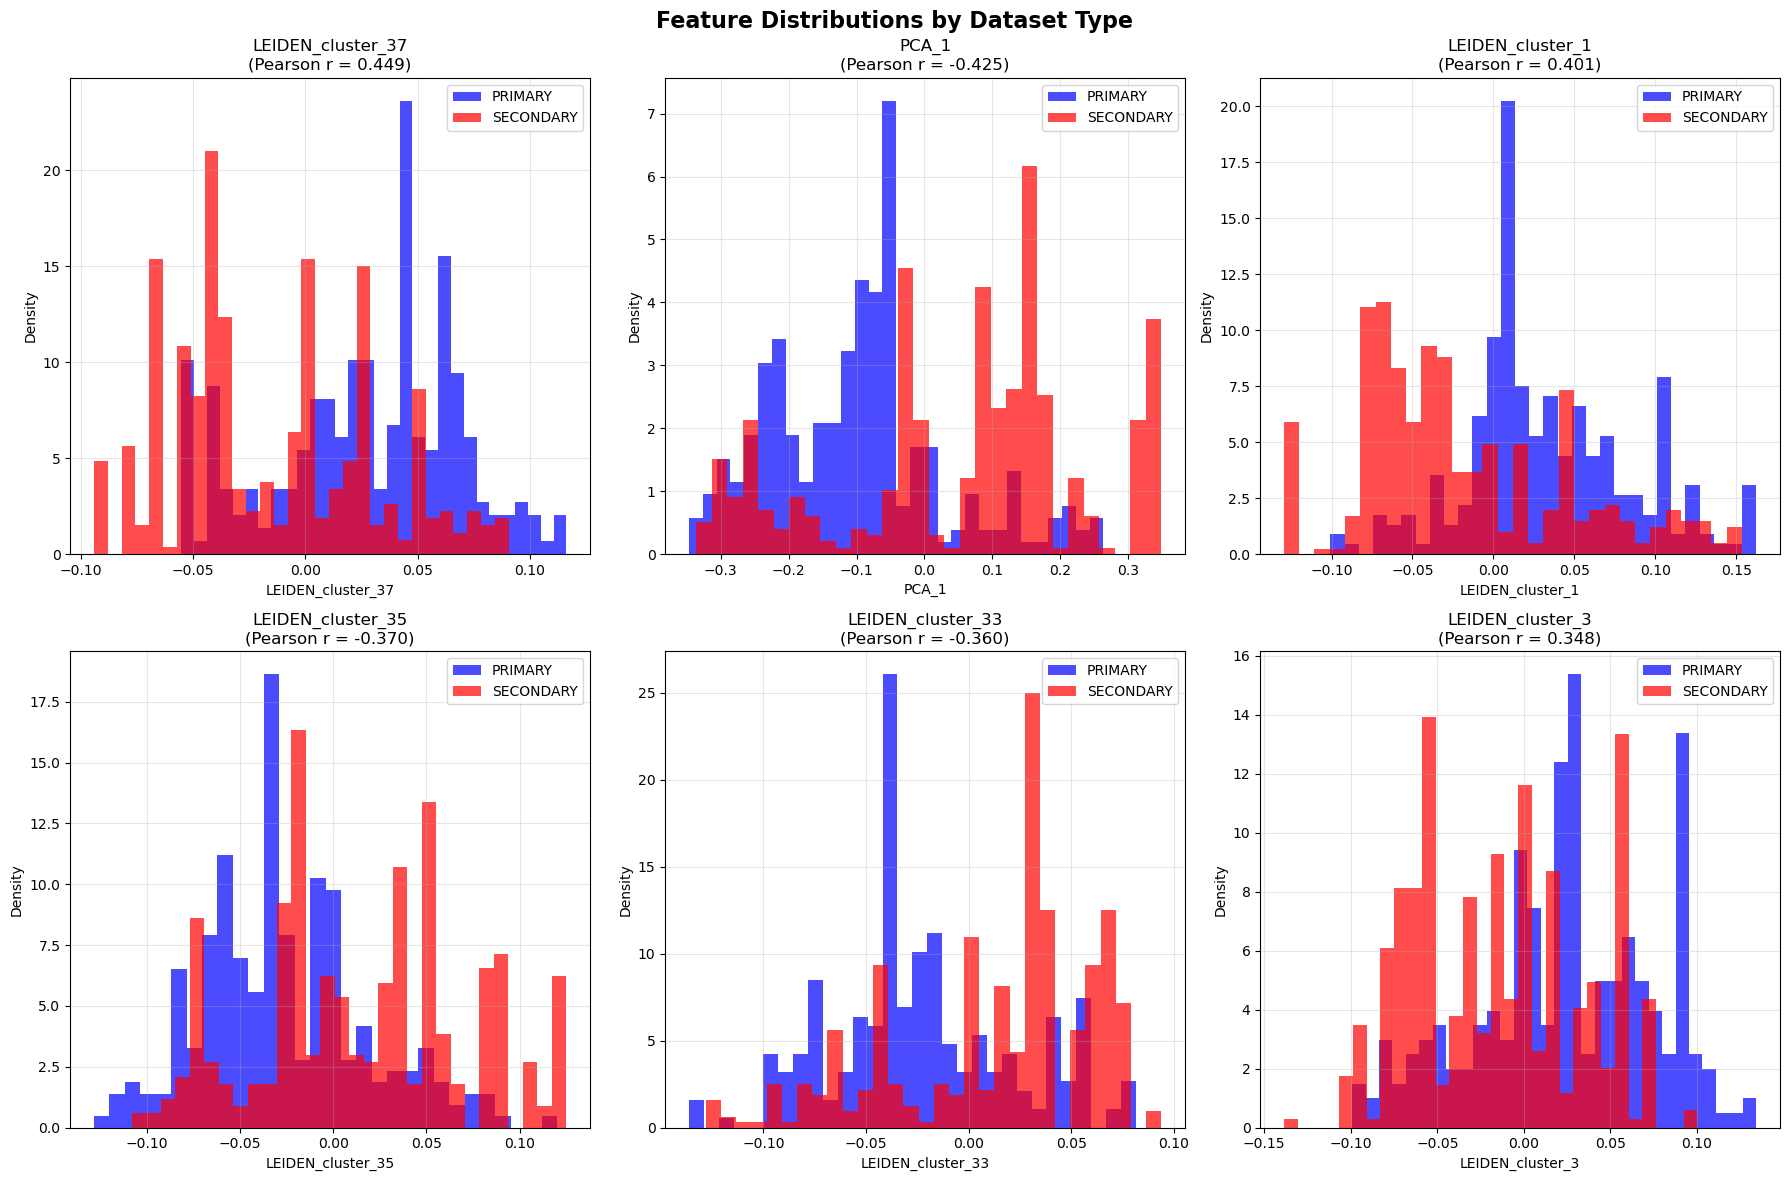

In [9]:
# 3. Correlation Heatmap of Top Features vs Target
print("🔄 Creating correlation heatmap...")

# Select top features for heatmap (to avoid overcrowding)
top_n = 20
top_feature_names = df_pearson.head(top_n)['feature'].tolist()

# Create correlation matrix for top features + target
heatmap_data = df_clean[top_feature_names + ['target']].corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(heatmap_data, dtype=bool))  # Mask upper triangle
sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8},
            mask=mask)
plt.title(f'Correlation Heatmap: Top {top_n} Features vs Target', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Distribution plots for top correlated features
print("🔄 Creating distribution plots for top features...")

# Get top 6 features for distribution plots
top_6_features = df_pearson.head(6)['feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_6_features):
    # Create density plots by target class
    primary_data = df_clean[df_clean['target'] == 1][feature]
    secondary_data = df_clean[df_clean['target'] == 0][feature]
    
    axes[i].hist(primary_data, alpha=0.7, label='PRIMARY', bins=30, density=True, color='blue')
    axes[i].hist(secondary_data, alpha=0.7, label='SECONDARY', bins=30, density=True, color='red')
    axes[i].set_title(f'{feature}\n(Pearson r = {df_pearson[df_pearson["feature"]==feature]["correlation"].iloc[0]:.3f})')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.suptitle('Feature Distributions by Dataset Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [10]:
# Step 5: Save correlation results to CSV files
print("🔄 Saving correlation results to CSV files...")

# Create output directory if it doesn't exist
output_dir = Path("reports/training_analysis")
output_dir.mkdir(parents=True, exist_ok=True)

# Add timestamp for unique filenames
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save Pearson correlations
pearson_file = output_dir / f"pearson_correlations_{timestamp}.csv"
df_pearson.to_csv(pearson_file, index=False)
print(f"✅ Pearson correlations saved to: {pearson_file}")

# Save Spearman correlations
spearman_file = output_dir / f"spearman_correlations_{timestamp}.csv"
df_spearman.to_csv(spearman_file, index=False)
print(f"✅ Spearman correlations saved to: {spearman_file}")

# Save comparison of both methods
comparison_full = df_pearson[['feature', 'correlation', 'p_value']].merge(
    df_spearman[['feature', 'correlation', 'p_value']], 
    on='feature', 
    suffixes=('_pearson', '_spearman')
)
comparison_full['correlation_difference'] = abs(comparison_full['correlation_pearson'] - comparison_full['correlation_spearman'])
comparison_full = comparison_full.sort_values('correlation_difference', ascending=False)

comparison_file = output_dir / f"correlation_comparison_{timestamp}.csv"
comparison_full.to_csv(comparison_file, index=False)
print(f"✅ Correlation comparison saved to: {comparison_file}")

# Save summary statistics
summary_stats = {
    'analysis_timestamp': timestamp,
    'total_samples': int(len(df_clean)),
    'total_features': int(len(feature_cols)),
    'primary_samples': int((df_clean['target'] == 1).sum()),
    'secondary_samples': int((df_clean['target'] == 0).sum()),
    'primary_percentage': float((df_clean['target'] == 1).mean() * 100),
    'max_pearson_correlation': float(df_pearson['abs_correlation'].max()),
    'max_spearman_correlation': float(df_spearman['abs_correlation'].max()),
    'top_pearson_feature': str(df_pearson.iloc[0]['feature']),
    'top_spearman_feature': str(df_spearman.iloc[0]['feature'])
}

summary_file = output_dir / f"analysis_summary_{timestamp}.json"
import json
with open(summary_file, 'w') as f:
    json.dump(summary_stats, f, indent=2)
print(f"✅ Analysis summary saved to: {summary_file}")

print(f"\n📁 All files saved to: {output_dir.absolute()}")


🔄 Saving correlation results to CSV files...
✅ Pearson correlations saved to: reports/training_analysis/pearson_correlations_20250814_161836.csv
✅ Spearman correlations saved to: reports/training_analysis/spearman_correlations_20250814_161836.csv
✅ Correlation comparison saved to: reports/training_analysis/correlation_comparison_20250814_161836.csv
✅ Analysis summary saved to: reports/training_analysis/analysis_summary_20250814_161836.json

📁 All files saved to: /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/notebooks/reports/training_analysis


In [11]:
# Step 6: Summary and Insights
print("📊 TRAINING INPUT ANALYSIS SUMMARY")
print("=" * 50)

print(f"\n🎯 Dataset Overview:")
print(f"   • Total samples: {len(df_clean):,}")
print(f"   • Total features: {len(feature_cols)}")
print(f"   • PRIMARY datasets: {(df_clean['target'] == 1).sum():,} ({(df_clean['target'] == 1).mean():.1%})")
print(f"   • SECONDARY datasets: {(df_clean['target'] == 0).sum():,} ({(df_clean['target'] == 0).mean():.1%})")

print(f"\n🔍 Correlation Analysis Results:")
print(f"   • Strongest Pearson correlation: {df_pearson.iloc[0]['feature']} (r = {df_pearson.iloc[0]['correlation']:.3f})")
print(f"   • Strongest Spearman correlation: {df_spearman.iloc[0]['feature']} (ρ = {df_spearman.iloc[0]['correlation']:.3f})")

# Identify features that are highly correlated with both methods
high_corr_threshold = 0.1  # Adjust as needed
pearson_high = set(df_pearson[df_pearson['abs_correlation'] > high_corr_threshold]['feature'])
spearman_high = set(df_spearman[df_spearman['abs_correlation'] > high_corr_threshold]['feature'])
both_high = pearson_high.intersection(spearman_high)

print(f"\n⭐ Features with |correlation| > {high_corr_threshold}:")
print(f"   • Pearson only: {len(pearson_high - both_high)} features")
print(f"   • Spearman only: {len(spearman_high - both_high)} features") 
print(f"   • Both methods: {len(both_high)} features")

if both_high:
    print(f"\n🎯 Top predictive features (high correlation in both methods):")
    for feature in list(both_high)[:10]:  # Show top 10
        p_corr = df_pearson[df_pearson['feature'] == feature]['correlation'].iloc[0]
        s_corr = df_spearman[df_spearman['feature'] == feature]['correlation'].iloc[0]
        print(f"   • {feature}: Pearson={p_corr:.3f}, Spearman={s_corr:.3f}")

print(f"\n📈 Key Insights:")
print(f"   • Based on the analysis, {'Spearman' if df_spearman.iloc[0]['abs_correlation'] > df_pearson.iloc[0]['abs_correlation'] else 'Pearson'} correlation shows stronger relationships")
print(f"   • Feature engineering has created {len(feature_cols)} potential predictors")
print(f"   • The target variable shows {'good' if max(df_pearson.iloc[0]['abs_correlation'], df_spearman.iloc[0]['abs_correlation']) > 0.3 else 'moderate' if max(df_pearson.iloc[0]['abs_correlation'], df_spearman.iloc[0]['abs_correlation']) > 0.1 else 'weak'} correlation with engineered features")

print(f"\n📁 Output Files:")
print(f"   • Pearson correlations: pearson_correlations_{timestamp}.csv")
print(f"   • Spearman correlations: spearman_correlations_{timestamp}.csv") 
print(f"   • Method comparison: correlation_comparison_{timestamp}.csv")
print(f"   • Analysis summary: analysis_summary_{timestamp}.json")

print(f"\n✅ Analysis complete! Ready for model training.")

# Close database connection
db_helper.close()
print("🔒 Database connection closed.")


2025-08-14 16:18:36,884 - src.helpers - INFO - Database connection closed
2025-08-14 16:18:36,884 - src.helpers - INFO - Database connection closed
2025-08-14 16:18:36,884 - src.helpers - INFO - Database connection closed


📊 TRAINING INPUT ANALYSIS SUMMARY

🎯 Dataset Overview:
   • Total samples: 692
   • Total features: 67
   • PRIMARY datasets: 259 (37.4%)
   • SECONDARY datasets: 433 (62.6%)

🔍 Correlation Analysis Results:
   • Strongest Pearson correlation: LEIDEN_cluster_37 (r = 0.449)
   • Strongest Spearman correlation: PCA_1 (ρ = -0.452)

⭐ Features with |correlation| > 0.1:
   • Pearson only: 1 features
   • Spearman only: 2 features
   • Both methods: 44 features

🎯 Top predictive features (high correlation in both methods):
   • LEIDEN_cluster_51: Pearson=-0.212, Spearman=-0.211
   • LEIDEN_cluster_41: Pearson=0.280, Spearman=0.322
   • LEIDEN_cluster_16: Pearson=-0.161, Spearman=-0.163
   • total_tokens: Pearson=0.113, Spearman=0.120
   • LEIDEN_cluster_10: Pearson=-0.122, Spearman=-0.102
   • LEIDEN_cluster_19: Pearson=0.165, Spearman=0.204
   • LEIDEN_cluster_24: Pearson=0.153, Spearman=0.141
   • LEIDEN_cluster_7: Pearson=-0.211, Spearman=-0.309
   • LEIDEN_cluster_34: Pearson=-0.105, Spe